# Задание 1 (1 балл)

Вы работаете продуктовым аналитиком в команде Алисы в Яндексе. В команде появилась новая идея - научить Алису рекомендовать фильмы и сериалы под настроение и вкусы пользователя.

Путь пользователя будет выглядеть так:
* Пользователь спрашивает "Алиса, порекомендуй фильм" или "Алиса, посоветуй фильм под хорошее настроение"
* Алиса задает уточняющие вопросы. Например, "Старый или новый фильм вы хотите?" или "Хотите фильм из жанра комедии?"
* По результатам Алиса рекомендует фильм с учетом вкусов пользователя

Ваша задача - понять на сколько эта фича востребована сейчас, затратив минимальные усилия на ее разработку.

Опишите как минимум два подхода, как бы вы решали эту задачу

<b>Решение:</b>

Во-первых, можно проанализировать на сколько фича востребована сейчас с помощью аналогичных серивисов Яндекса. Например, можно проанализировать как часто пользователи смотрят фильм из рекомендаций на Кинопоиске. Так же можно посмотреть как часто пользователь "яндексит" фильмы, и сколько из них потом смотрит.

Во-вторых, можно проанализирвоать конкурентов (например, Amazon Alexa и Amazon Prime) и по отзывам пользователей оценить, на сколько часто они пользуются этой функцией.

# Задание 2

## 2.1 (0.5 балла)

В файле data.tsv представлены логи пользователей для стартапа по автоматической генерации рекламных объявлений, который мы рассматривали на лекции.

Напомним, как выглядит путь пользователя в этом продукте:
1. Пользователь заходит на Landing-page, на которой представлена основная информация о продукте.
2. Если его заинтересовал продукт, ему нужно зарегестрироваться, чтобы им воспользоваться.
3. Далее он попадает в Личный Кабинет, где может указать URL своего сайта и запустить для него генерацию рекламных объявлений.
4. Когда пользователь запускает генерацию, мы прокачиваем информацию с его сайта и подаем на вход генеративным нейросетям.
5. Когда генерация закончена, мы показываем готовые рекламные объявления пользователю. Далее пользователь использует эти объявления на рекламных площадках для продвижения своего бизнеса.
6. Пользователю предлагается 3 бесплатных генерации, после чего ему предлагается опатить сервис, чтобы пользоваться дальше.

Опишем события
* event_timestamp - время, когда произошло событие в формате datetime
* user_id - уникальные идентификатор пользователя
* event_name - тип события. Существуют следующие типы:
    * visit_landing - посещение лендинга
    * visit_cabinet - посещение ЛК
    * generate - запуск генерации рекламного объявления
    * results_shown - пользователь увидел результаты генерации
    * payment - пользователь оплатил сервис
* traffic_name - для событий **event_name = visit_landing** в этом поле записывается Маркетинговый канал с которого мы привлекли пользователя на наш сервис
* generation_time - для событий **event_name = generate** время в секундах, сколько длилась генерация. Если поле пустое, то генерация по каким-то причинам упала с ошибкой

Ваша задача - нарисовать воронку уникальных пользователей по основным этапам
* Пришел на лендинг
* Зарегистрировался
* Запустил генерацию
* Увидел результаты
* Оплатил

Для отрисовки воронки рекомендуем использовать библиотеку plotly

In [1]:
import pandas as pd
df = pd.read_csv("data.tsv", sep="\t")
df.sample(5)

,event_timestamp,user_id,traffic_name,event_name,generation_time
29165,2023-05-20 05:19:13.440832,df0a4749deb040afa445a43123da30e126b93474,source1,visit_landing,NaN
17913,2023-05-04 09:54:10.772887,a024ef7251fe6ab4cd42b22d337c323ca2923882,source2,visit_landing,NaN
25490,2023-05-15 04:41:23.322657,cdf6a8b0ca6c3c90bfb47f85642f1d32e28140bc,source1,visit_landing,NaN
13083,2023-05-01 18:43:19.199713,708bd42adbd9dee7237a8aafcb5f6c7caaf21708,source2,visit_landing,NaN
27965,2023-05-18 09:04:27.015864,87ff73ab8caad32065bb636327887c440e724490,source1,visit_landing,NaN


In [2]:
import plotly.graph_objects as go

funnel_data = {
    'Step': ['Пришел на лендинг', 'Зарегистрировался', 'Запустил генерацию', 'Увидел результаты', 'Оплатил'],
    'Users': [
        len(df[df['event_name'] == 'visit_landing']['user_id'].unique()),
        len(df[df['event_name'] == 'visit_cabinet']['user_id'].unique()),
        len(df[df['event_name'] == 'generate']['user_id'].unique()),
        len(df[df['event_name'] == 'results_shown']['user_id'].unique()),
        len(df[df['event_name'] == 'payment']['user_id'].unique())
    ]
}

fig = go.Figure(go.Funnel(
    y=funnel_data['Step'],
    x=funnel_data['Users'],
    textposition="inside",
    textinfo="value+percent initial"))

fig.update_layout(
    title="Воронка уникальных пользователей",
    font=dict(size=12)
)

fig.show()

# 2.2 (0.5 балла)

Видно, что до этапа оплаты доходит очень мало пользователей. Давайте заменим последний этап на другой показатель - "Количество пользователей с минимум двумя успешными генерациями".
Так у нас будет больше статистики на последнем этапе. При этом, по логике продукта, этот этап должен коррелировать с оплатами.

Нарисуйте воронку, заменив последний этап на предложенный показатель.

In [3]:
import plotly.graph_objects as go

funnel_data = {
    'Step': ['Пришел на лендинг', 'Зарегистрировался', 'Запустил генерацию', 'Увидел результаты',
             'Два успешных запуска'],
    'Users': [
        len(df[df['event_name'] == 'visit_landing']['user_id'].unique()),
        len(df[df['event_name'] == 'visit_cabinet']['user_id'].unique()),
        len(df[df['event_name'] == 'generate']['user_id'].unique()),
        len(df[df['event_name'] == 'results_shown']['user_id'].unique()),
        len(df[df['event_name'] == 'generate'].groupby('user_id').filter(lambda x: len(x) >= 2)['user_id'].unique())
    ]
}

fig = go.Figure(go.Funnel(
    y=funnel_data['Step'],
    x=funnel_data['Users'],
    textposition="inside",
    textinfo="value+percent initial"))

fig.update_layout(
    title="Воронка уникальных пользователей",
    font=dict(size=12)
)

fig.show()

## 2.3 (1 балл)

Сейчас мы превлекаем клиентов на сайт с помощью нескольких маркетинговых компаний (колонка traffic_source). Команда маркетинга, просит вас помочь им понять, какая из рекламных компаний более выгодная: source1 или source2.

Помогите им это определить, учитывая что стоимость привлечения одного человека на лендинг для
* source1 - 2 цента
* source2 - 1 цент

и мы хотим растить последний этап воронки с предыдущего задания

Нужно не только дать ответ, но и расписать как вы к нему пришли.

In [5]:
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv('data.tsv', sep='\t')
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'])

source1_users = data[data['traffic_name'] == 'source1'] \
    .drop_duplicates(subset='user_id')

source2_users = data[data['traffic_name'] == 'source2'] \
    .drop_duplicates(subset='user_id')

source1_registration_users = source1_users['user_id'] \
    .isin(data[data['event_name'] == 'visit_cabinet']['user_id']).sum()
source1_generation_users = source1_users['user_id'] \
    .isin(data[data['event_name'] == 'generate']['user_id']).sum()
source1_results_users = source1_users['user_id'] \
    .isin(data[data['event_name'] == 'results_shown']['user_id']).sum()
source1_repeat_generation_users = source1_users['user_id'] \
    .isin(data[data['event_name'] == 'generate'].groupby('user_id') \
    .filter(lambda x: len(x) >= 2)['user_id']).sum()

source2_registration_users = source2_users['user_id'] \
    .isin(data[data['event_name'] == 'visit_cabinet']['user_id']).sum()
source2_generation_users = source2_users['user_id'] \
    .isin(data[data['event_name'] == 'generate']['user_id']).sum()
source2_results_users = source2_users['user_id'] \
    .isin(data[data['event_name'] == 'results_shown']['user_id']).sum()
source2_repeat_generation_users = source2_users['user_id'] \
    .isin(data[data['event_name'] == 'generate'].groupby('user_id') \
    .filter(lambda x: len(x) >= 2)['user_id']).sum()

fig = go.Figure()

fig.add_trace(go.Funnel(
    name='Source 1',
    y=['Лендинг', 'Регистрация', 'Генерация', 'Результаты', 'Повторная генерация'],
    x=[source1_users.shape[0], source1_registration_users, source1_generation_users,
       source1_results_users, source1_repeat_generation_users],
    textposition='inside',
    textinfo='value+percent previous'))

fig.add_trace(go.Funnel(
    name='Source 2',
    orientation='h',
    y=['Лендинг', 'Регистрация', 'Генерация', 'Результаты', 'Повторная генерация'],
    x=[source2_users.shape[0], source2_registration_users, source2_generation_users,
       source2_results_users, source2_repeat_generation_users],
    textposition='inside',
    textinfo='value+percent previous'))

fig.update_layout(
    title="Воронка по этапам",
    showlegend=True,
)

fig.show()

Заметим, что первый источник привлек 6928 чел, а второй 4263. Но в итоге до последнего этапа дошло 141 и 60 человек соответственно. Значит привлечение одного "качественного" клиента первым способом стоит
$\frac{6928 \cdot 2}{141} = 98.3$ центов, а вторым $\frac{4263 \cdot 1}{60} = 71.05$ цент. Значит второй источник привлечения является более выгодным.

## 2.4 (1 балл)

Команда хочет понимать, что движется в правильном направлении и релизы действительно улучшают показатели воронки.

Постройте линейные графики конверсий соседних этапов воронками (Лендинг -> регистрация, регистрация -> генерация и тд) со скользящим окном в одну неделю.

Для этого в каждой точке нужно взять данные за последнюю неделю и посчитать конверсии по уникальным пользователям, **впервые попавшим на наш сервис** в данном окне времени.

In [6]:
import pandas as pd

data = pd.read_csv('data.tsv', sep='\t')
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'])

conversion_data = {
    'Landing -> Registration': [],
    'Registration -> Generation': [],
    'Generation -> Results': [],
    'Results -> Repeat': []
}

unique_users = data.groupby(pd.Grouper(key='event_timestamp', freq='W'))['user_id'].nunique()

for i in range(len(unique_users) - 1):
    window_start = unique_users.index[i]
    window_end = unique_users.index[i+1]
    window_data = data[(data['event_timestamp'] >= window_start) & (data['event_timestamp'] < window_end)]

    landing_users = window_data[window_data['event_name'] == 'visit_landing']['user_id'].nunique()
    registration_users = window_data[window_data['event_name'] == 'visit_cabinet']['user_id'].nunique()
    generation_users = window_data[window_data['event_name'] == 'generate']['user_id'].nunique()
    results_users = window_data[window_data['event_name'] == 'results_shown']['user_id'].nunique()

    repeat_generation_users = window_data[window_data['event_name'] == 'generate'].groupby('user_id') \
                                    .filter(lambda x: len(x) >= 2)['user_id'].nunique()

    conversion_data['Landing -> Registration'].append(registration_users / max(landing_users, 1))
    conversion_data['Registration -> Generation'].append(generation_users / max(registration_users, 1))
    conversion_data['Generation -> Results'].append(results_users / max(generation_users, 1))
    conversion_data['Results -> Repeat'].append(repeat_generation_users / max(results_users, 1))

fig = go.Figure()
x_values = unique_users.index[1:]

for stage, values in conversion_data.items():
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=stage))

fig.update_layout(
    title='Конверсии между этапами воронки',
    xaxis_title='Неделя',
    yaxis_title='Конверсия',
    legend_title='Этапы',
    hovermode='x',
    yaxis_range=[0, 1]
)
fig.show()

# 2.5 (1 балл)

У команды появилась гипотеза, что пользователи часто не дожидаются окончания генерации, так как она длится долго (20+ секунд). Тем более, что на экране генерации пользователю показывается бесконечный спиннер и ему непонятно, есть ли какой-то прогресс в генерации или сервис давно сломался.

20 мая экран генерации поменяли. Пользователю, вместо спиннера, показывается сообщение с текстом "Спасибо за ожидание! Генерация рекламы длится до одной минуты. Еще немного и вы получите лучшие рекламные объявления"

Аналитик решил проверить, как время генерации для первого запуска пользователя влияет на его конверсию в последующую генерацию.

Ниже представлен график по данным с 20 мая.
1. Попробуйте построить такой же график
2. Напишите, как вы интерпретируете, данные на графике

In [ ]:
# import seaborn as sns

# sns.histplot(res, x="generation_time", hue="two_or_more_generations", stat="density", common_norm=False, binrange=(0, 200))

![res](2_5_ans.png)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

pre_may_users = data[data['event_name'] == 'generate'][data['event_timestamp']
                    .dt.date < pd.to_datetime('2023-05-20').date()]['user_id'].unique()

filtered_data = data[~data['user_id'].isin(pre_may_users)][data['event_timestamp']
                            .dt.date >= pd.to_datetime('2023-05-20').date()].reset_index(drop=True)

res = filtered_data[filtered_data['event_name'] == 'generate'].drop_duplicates('user_id').reset_index(drop=True)

res['two_or_more_generations'] = res['user_id'].isin(filtered_data[filtered_data['event_name'] == 'generate']
    .groupby('user_id').filter(lambda x: len(x) >= 2)['user_id']).reset_index(drop=True)

res = res.groupby('user_id').first().reset_index()
res.dropna(subset=['generation_time'], inplace=True)
res.sample(5)

<ipython-input-8-bbc2dc221165>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-8-bbc2dc221165>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,user_id,event_timestamp,traffic_name,event_name,generation_time,two_or_more_generations
133,85e2427d7601f362268307346a4ddfd6b90fddf1,2023-05-28 15:54:57,None,generate,26.0,False
140,894c976591caa0423036bb13fb6fbacf3aa5c573,2023-05-26 10:56:31,None,generate,30.0,False
35,21a10f2f4c71084d0c0c22908b06adc4dc5f4a45,2023-05-20 18:53:29,None,generate,78.0,False
145,9233f702a7c23352384d74600322468063ec62c1,2023-05-21 08:56:35,None,generate,32.0,False
179,adda27dc2533bb2b2e2ca72c6c0da69498d0edec,2023-05-31 12:21:21,None,generate,30.0,False


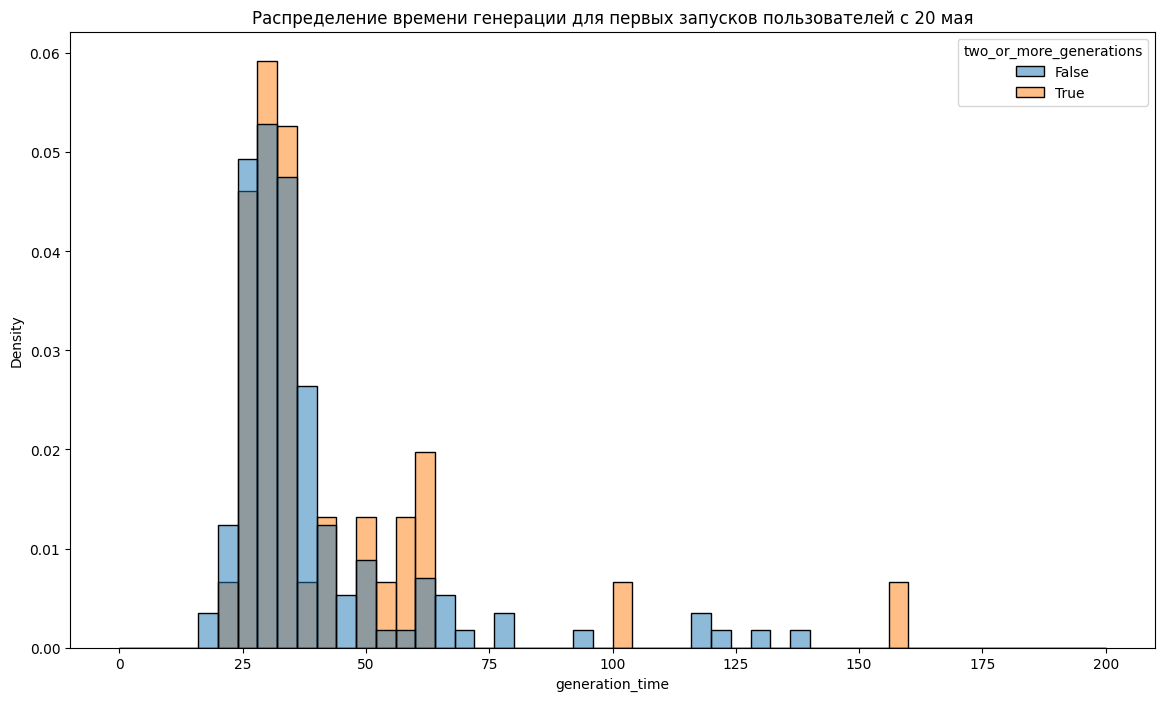

In [9]:
plt.figure(figsize=(14, 8))
sns.histplot(data=res, x='generation_time', hue='two_or_more_generations', stat='density',
             common_norm=False, binrange=(0, 200))
plt.xlabel('generation_time')
plt.ylabel('Density')
plt.title('Распределение времени генерации для первых запусков пользователей с 20 мая')
plt.show()

Можно заметить, что для времени генерации <40 сек пользователи почти равновероятно либо генерируют, либо не генерируют еще одну картинку. При этом большинство пользователей, у которых генерация заняла от 50 до 60 сек генерируют еще картинки